In [2]:
import numpy as np
import pandas as pd
import os

Lendo os arquivos

In [3]:
df = pd.read_csv("netflix_titles.csv", index_col = "show_id")

In [4]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


### Tratando os dados para análise

In [6]:
# Removendo coluna de sinopse

df.drop(columns="description",inplace = True)

In [7]:
# Transformando o formato para data

df["date_added"] = pd.to_datetime(df["date_added"])

In [8]:
# Identificando valores ausentes

df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

In [9]:
# Separando os dados entre Filmes e Séries:

movies = df[df["type"] == "Movie"].copy()
series = df[df["type"] == "TV Show"].copy()

In [10]:
movies.isna().sum()

type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
dtype: int64

In [11]:
movies.shape

(6131, 10)

In [12]:
series.isna().sum()

type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
dtype: int64

In [13]:
series.shape

(2676, 10)

### Analisando os Filmes

In [14]:
movies.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas"
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies"


In [15]:
categories = list()

In [16]:
for x,y in enumerate(movies["listed_in"]):
    categories.append(y.split(sep = ",")) 

In [17]:
x = list()
for item in categories:
    x.append(len(item))
max(x)

3

### Obs: O máximo de categorias na qual um filme pode pertencer são 3.

In [18]:
# Ajustando países com nome inválido

movies["country"] = np.where(movies["country"].isna(),
                            "Unknown",
                            movies["country"])

# EDA

##### **Perguntas a serem respondidas:**
1. Quais são os diretores que possuem a maior quantidade de filmes em catálogo ?

2. Quais são os países que possuem a maior quantidade de filmes em catálogo ?

3. Qual a distribuição das indicações dos filmes ? (Perfil indicativo)
    
    3.1. Qual é o perfil indicativo dos filmes para os países com mais filmes ?
    
    3.2. Quais são os diretores que possuem maior quantidade de filmes para cada Perfil Indicativo ?

4. Qual são as faixas de ano de lançamento dos filmes ?

5. Após a criação da Netflix, qual o tempo médio para a inclusão do filme em catálogo ?

6. Qual a distribuição de duração dos filmes ?
    
    6.1.Qual a distribuição de duração dos filmes por perfil indicativo ?
    
    6.2. Quais são os países que possuem filmes mais longos ?

7. Quais são os atores que estão mais presentes ?

8. Quais são as categorias de filmes mais presentes ?

9. Quais são os filmes onde existem diretores e atores ? **


### 1. Quais são os diretores que possuem maior quantidade de filmes em Catálogo ?

In [19]:
directors = pd.DataFrame(movies.value_counts(subset="director"),columns=["Quantity"])


In [20]:
directors

,Quantity
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14
...,...
Jose Gomez,1
Jose Javier Reyes,1
Bilal Lashari,1


## 2. Quais são os países que possuem maior quantidade de filmes em catálogo ?

#### Ainda é necessário tratar os dados onde existe mais de um país indicado para o filme

In [21]:
movies.value_counts(subset=["country","director"])

country        director                  
Unknown        Rajiv Chilaka                 16
               Suhas Kadav                   15
United States  Marcus Raboy                  14
               Jay Karas                     14
Philippines    Cathy Garcia-Molina           13
                                             ..
Mexico         Eric D. Cabello Díaz           1
               Eugenio Derbez                 1
               Everardo González              1
               Fernando Frías De La Parra     1
Zimbabwe       Tomas Brickhill                1
Length: 4790, dtype: int64

In [22]:
movies.isna().value_counts("director")

director
False    5943
True      188
dtype: int64

### 3. Qual a distribuição das indicações dos filmes? 

In [23]:
# Existem dados errados, onde nas indicações dos filmes estão sendo postos a duração do filme

ratings = pd.DataFrame(movies["rating"].value_counts(normalize = True))
ratings["rating"] = ratings["rating"]*100 

In [24]:
ratings = ratings[0:14]
ratings

,rating
TV-MA,33.643335
TV-14,23.282754
R,13.003753
TV-PG,8.810573
PG-13,7.994779
PG,4.682656
TV-Y7,2.267907
TV-Y,2.137380
TV-G,2.055800
NR,1.223691


### 3.1 Qual é o perfil indicativo dos filmes para os países com mais filmes ?

In [25]:
countries_1 = movies["country"].str.split(",")

In [26]:
countries_1

show_id
s1                                         [United States]
s7                                               [Unknown]
s8       [United States,  Ghana,  Burkina Faso,  United...
s10                                        [United States]
s13                             [Germany,  Czech Republic]
                               ...                        
s8802                      [United Arab Emirates,  Jordan]
s8803                                      [United States]
s8805                                      [United States]
s8806                                      [United States]
s8807                                              [India]
Name: country, Length: 6131, dtype: object

In [27]:
countries = [] 
for i in countries_1:
    for t in i:
        countries.append(t)

In [28]:
countries

['United States',
 'Unknown',
 'United States',
 ' Ghana',
 ' Burkina Faso',
 ' United Kingdom',
 ' Germany',
 ' Ethiopia',
 'United States',
 'Germany',
 ' Czech Republic',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'India',
 'Unknown',
 'United States',
 'United States',
 'United States',
 ' India',
 ' France',
 'Unknown',
 'Unknown',
 'Unknown',
 'China',
 ' Canada',
 ' United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'Unknown',
 'South Africa',
 ' United States',
 ' Japan',
 'United States',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Japan',
 'Unknown',
 'Unknown',
 'Unknown',
 'Nigeria',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'Unknown',
 'United States',
 'Nigeria',
 'Unknown',
 'Unknown',
 'Spain',
 ' United States',
 'France',
 'Unknown',
 'United Kingdom',
 ' United States',
 'United States',
 'United States',
 'Unknown',
 'India',
 'United St

In [29]:
for x,y in enumerate(countries):
    countries[x] = countries[x].lstrip(" ")

In [30]:
countries = pd.DataFrame(countries, columns = ["Country"])
countries.head()

,Country
0,United States
1,Unknown
2,United States
3,Ghana
4,Burkina Faso


In [31]:
countries.value_counts("Country")

# Estados Unidos, India, Reino Unido, Desconhecido e Canadá são os países com maior quantidade de filmes me cartaz no netflix

Country
United States         2752
India                  962
United Kingdom         534
Unknown                440
Canada                 319
                      ... 
Somalia                  1
Dominican Republic       1
Liechtenstein            1
Lithuania                1
Ecuador                  1
Length: 119, dtype: int64

In [32]:
top_countries = ["United States", "India", "United Kingdom", "Unknown", "Canada"]
indic = pd.DataFrame(np.nan, columns= ratings.index, index = top_countries)
indic

,TV-MA,TV-14,R,TV-PG,PG-13,PG,TV-Y7,TV-Y,TV-G,NR,G,TV-Y7-FV,NC-17,UR
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Criando variáveis dummy para os países com mais filmes
movies[top_countries] = np.nan
for item in top_countries:
    movies["{item}".format(item = item)] = np.where(movies["country"].str.contains("{item}".format(item = item)), 1, 0)
rating_country = movies.groupby("rating")[top_countries].sum().reset_index()

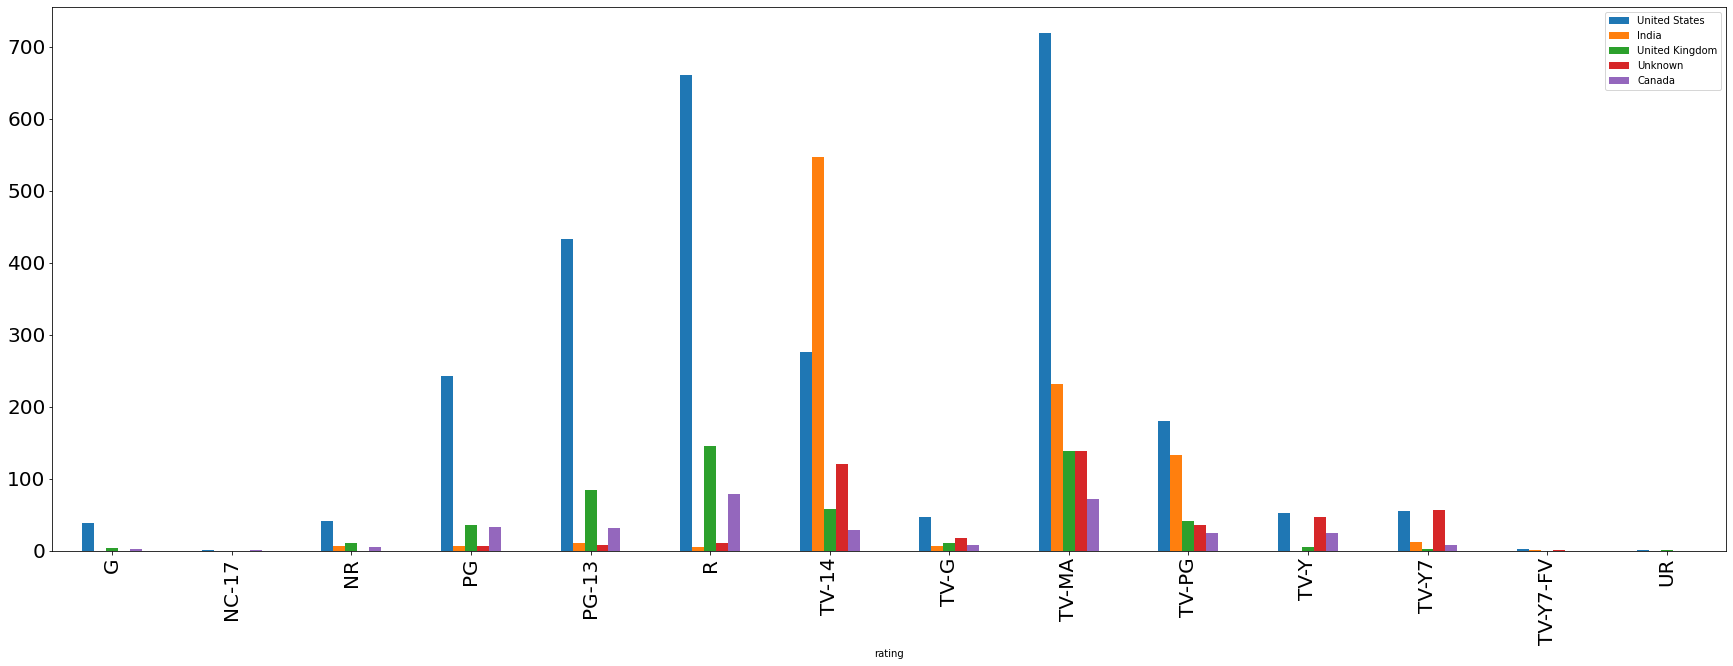

In [52]:
ax = rating_country[3:].plot(x = "rating", kind = "bar", figsize =(30,10), fontsize = 20)

### 3.2 Quais são os diretores que possuem maior quantidade de filmes para cada Perfil Indicativo ?

### 4. Qual são as faixas de ano de lançamento dos filmes ?

### 5. Após a criação da Netflix, qual o tempo médio para a inclusão do filme em catálogo ?

### 6. Qual a distribuição de duração dos filmes ?

### 6.1. Qual a distribuição de duração dos filmes por perfil indicativo ?

### 6.2. Quais são os países que possuem filmes mais longos ?

### 7. Quais são os atores que estão mais presentes ? 

### 8. Quais são as categorias de filmes mais presentes ?

###  9. Quais são os filmes onde existem diretores e atores ?

In [178]:
df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

show_id
s1                                         [Documentaries]
s2       [International TV Shows, TV Dramas, TV Mysteries]
s3       [Crime TV Shows, International TV Shows, TV Ac...
s4                                [Docuseries, Reality TV]
s5       [International TV Shows, Romantic TV Shows, TV...
                               ...                        
s8803                     [Cult Movies, Dramas, Thrillers]
s8804             [Kids' TV, Korean TV Shows, TV Comedies]
s8805                            [Comedies, Horror Movies]
s8806                 [Children & Family Movies, Comedies]
s8807     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object